 # <span style="color:green">__Universidad EAN:</span> Facultad de Ingenieria - Maestría en Ciencias de Datos__
 ## **<span style="color:orange">Procesamiento de Lenguaje Natural</span>**
 ## **<span style="color:orange">Taller 2</span>**

* __Geraldine Giseth Patiño Pardo__
* __Juan Sebastian Lozano Forero__
* __Natalia Rico Torres__

# __1. Importación y Carga de Librerias__

In [1]:
import re ## Exprexiones regulares
import nltk ## Procesamiento de lenguaje natural
import unicodedata
from nltk.corpus import stopwords ## Palabras vacias
from nltk.stem import SnowballStemmer ## Stemming
from nltk.tokenize import word_tokenize ## Tokenizacion
from nltk.tokenize import RegexpTokenizer ## Tokenizacion
from sklearn.feature_extraction.text import CountVectorizer ## Vectorizador 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import spacy ## Procesamiento de lenguaje natural

############## Descarga de recursos de nltk ################
nltk.download('punkt') ## Tokenizador
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# __2. Carga de base de datos__

In [2]:
## Se carga la base de datos
import pandas as pd

Booking_df=pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')
Booking_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11028\3885224651.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Booking_df=pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
438208,438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,"9,0",NaN,NaN,No
438209,438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10,NaN,NaN,No
438210,438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,"1,0",No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10,NaN,NaN,No


# __3. Se generan Dataframes con reseñas de Colombia tanto positivas como negativas__

In [3]:
# Filtrar y eliminar los registros donde 'reseña' sea "No" y 'País' sea "Colombia"
BookingCol = Booking_df[(Booking_df['reseña'] == 'Sí') & (Booking_df['País'] == 'Colombia')]

In [4]:
BookingCol['Calificación']=BookingCol['Calificación'].str.replace(',','.').astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11028\3907479697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BookingCol['Calificación']=BookingCol['Calificación'].str.replace(',','.').astype(float)


In [5]:
DF_inicial=BookingCol[BookingCol['Calificación']<=7]
DF_inicial=DF_inicial['Cosas Negativas']
DF_inicial=DF_inicial[DF_inicial.fillna('').apply(len)>60].sample(7500)
DF_inicial

224463    Pésimo servicio , la habitación sucia , por 10...
347406    En el espacio se sentía el olor a cigarrillo t...
336311    No me aloje en el hotel que reservé, ya que po...
79142     Era acomodación triple, una de las camas, la s...
91160     es solo, aburrido, hay q usar gorro en la pisc...
                                ...                        
128380    En nuestro cuarto, la puerta del baño no cerra...
294327    Que en la descripción no hablan del precio del...
413778    me cobraron más de lo que reservé por la págin...
130233    La atención de las personas que atendían en re...
431770    Habitación sin ventana y no habia puerta en la...
Name: Cosas Negativas, Length: 7500, dtype: object

In [6]:
DF_Final=pd.DataFrame()

DF_Final['Comentarios']=DF_inicial
DF_Final['Clas']='Negativos'
DF_Final

,Comentarios,Clas
224463,"Pésimo servicio , la habitación sucia , por 10...",Negativos
347406,En el espacio se sentía el olor a cigarrillo t...,Negativos
336311,"No me aloje en el hotel que reservé, ya que po...",Negativos
79142,"Era acomodación triple, una de las camas, la s...",Negativos
91160,"es solo, aburrido, hay q usar gorro en la pisc...",Negativos
...,...,...
128380,"En nuestro cuarto, la puerta del baño no cerra...",Negativos
294327,Que en la descripción no hablan del precio del...,Negativos
413778,me cobraron más de lo que reservé por la págin...,Negativos
130233,La atención de las personas que atendían en re...,Negativos


In [7]:
DF_inicial2=BookingCol[BookingCol['Calificación']>=9]

DF_inicial2=DF_inicial2['Cosas Positivas']
DF_inicial2=DF_inicial2[DF_inicial2.fillna('').apply(len)>60].sample(7500)
DF_inicial2

211468    El desayuno podría tener mejores opciones, per...
171662    La atención a mis papás que fueron quienes se ...
244918    SUPER BIEN EL TRASLADO, SENCILLO FACIL Y COMOD...
155945    Muy buena ubicación, habitaciones super amplia...
204837    Desayuno buffet muy completo, las habitaciones...
                                ...                        
87182     excelente atención, excelentes instalaciones, ...
251589    limpieza, estilo y decoración, cama muy cómoda...
201810    Las instalaciones son de lo mejor, super limpi...
41908     las personas .. atentas colaboradoras y el tra...
329548    La cordialidad de las personas que trabajan en...
Name: Cosas Positivas, Length: 7500, dtype: object

In [8]:
DF_Final_2=pd.DataFrame()

DF_Final_2['Comentarios']=DF_inicial2
DF_Final_2['Clas']='Positivos'
DF_Final_2

,Comentarios,Clas
211468,"El desayuno podría tener mejores opciones, per...",Positivos
171662,La atención a mis papás que fueron quienes se ...,Positivos
244918,"SUPER BIEN EL TRASLADO, SENCILLO FACIL Y COMOD...",Positivos
155945,"Muy buena ubicación, habitaciones super amplia...",Positivos
204837,"Desayuno buffet muy completo, las habitaciones...",Positivos
...,...,...
87182,"excelente atención, excelentes instalaciones, ...",Positivos
251589,"limpieza, estilo y decoración, cama muy cómoda...",Positivos
201810,"Las instalaciones son de lo mejor, super limpi...",Positivos
41908,las personas .. atentas colaboradoras y el tra...,Positivos


In [9]:
# Combinar los dataframes apilando filas
DF_BookingCol = pd.concat([DF_Final, DF_Final_2], ignore_index=True)

# Verificar el resultado
print(DF_BookingCol.shape)

(15000, 2)


# __4. A continuación se ejecutará cada los siguientes pasos dentro del procesamiento de texto:__
* __4.1. Normalización de texto__
* __4.2. Tokenización__
* __4.3. Eliminación de stopwords__
* __4.4. Stemming y lematización__
* __4.5. Bag of words__

## 4.1. Normalización de texto

In [10]:
# Función para limpiar caracteres y eliminar tildes
def limpiar_caracteres_no_espanol_sin_tildes(texto):
    # Eliminar caracteres especiales y palabras en alfabetos no latinos
    texto = re.sub(r'[^\d\w\sñÑ]', '', texto)  # Solo deja palabras y espacios
    texto = re.sub(r'[^\u0000-\u007F\u00C0-\u017F\sñÑ]', '', texto)  # Filtrar caracteres no latinos
    
    # Normalizar y eliminar tildes
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
    texto = re.sub(r'[\u0300-\u036f]', '', texto).strip()  # Eliminar marcas de acento (diacríticos)
    
    return texto

# Aplicar al DataFrame
DF_BookingCol['Texto_Limpio'] = DF_BookingCol['Comentarios'].apply(limpiar_caracteres_no_espanol_sin_tildes)

# Ver el resultado
print(DF_BookingCol[['Comentarios', 'Texto_Limpio']].head())


                                         Comentarios  \
0  Pésimo servicio , la habitación sucia , por 10...   
1  En el espacio se sentía el olor a cigarrillo t...   
2  No me aloje en el hotel que reservé, ya que po...   
3  Era acomodación triple, una de las camas, la s...   
4  es solo, aburrido, hay q usar gorro en la pisc...   

                                        Texto_Limpio  
0  Pesimo servicio  la habitacion sucia  por 10\n...  
1  En el espacio se sentia el olor a cigarrillo t...  
2  No me aloje en el hotel que reserve ya que pod...  
3  Era acomodacion triple una de las camas la sen...  
4  es solo aburrido hay q usar gorro en la piscin...  


In [11]:
# Función actualizada para eliminar números y normalizar texto
def normalizar_texto_completamente(texto):
    if isinstance(texto, str):  # Asegurarse de procesar solo texto
        # Eliminar números
        texto = re.sub(r'\d', '', texto)
        # Eliminar caracteres especiales y normalizar tildes
        texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
        # Eliminar espacios adicionales
        texto = re.sub(r'\s+', ' ', texto).strip()
        return texto
    return texto  # Si no es texto, devolver sin cambios

# Aplicar la función de limpieza
DF_BookingCol['Texto_Limpio'] = DF_BookingCol['Texto_Limpio'].apply(normalizar_texto_completamente)

## 4.2. Tokenización

In [12]:
# Asegúrate de descargar el recurso necesario
nltk.download('punkt')

# Aplicar la tokenización por palabras a cada fila de la columna 'Comentarios'
DF_BookingCol['Tokens'] = DF_BookingCol['Texto_Limpio'].apply(word_tokenize)

# Ver el resultado
print(DF_BookingCol[['Comentarios', 'Texto_Limpio', 'Tokens']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Comentarios  \
0      Pésimo servicio , la habitación sucia , por 10...   
1      En el espacio se sentía el olor a cigarrillo t...   
2      No me aloje en el hotel que reservé, ya que po...   
3      Era acomodación triple, una de las camas, la s...   
4      es solo, aburrido, hay q usar gorro en la pisc...   
...                                                  ...   
14995  excelente atención, excelentes instalaciones, ...   
14996  limpieza, estilo y decoración, cama muy cómoda...   
14997  Las instalaciones son de lo mejor, super limpi...   
14998  las personas .. atentas colaboradoras y el tra...   
14999  La cordialidad de las personas que trabajan en...   

                                            Texto_Limpio  \
0      Pesimo servicio la habitacion sucia por Minuto...   
1      En el espacio se sentia el olor a cigarrillo t...   
2      No me aloje en el hotel que reserve ya que pod...   
3      Era acomodacion triple una de la

## 4.3. Eliminación de stopwords

In [13]:
# Stopwords en español e inglés como conjuntos
stopwords_esp = set(stopwords.words('spanish'))  # Convertir a conjunto
stopwords_eng = set(stopwords.words('english'))  # Convertir a conjunto

# Combinar ambas listas de stopwords
stopwords_combined = stopwords_esp.union(stopwords_eng)  # Unir ambos conjuntos

# Verificar la combinación
print(f"Total stopwords combinadas: {len(stopwords_combined)}")

# Eliminar stopwords en ambos idiomas
DF_BookingCol['Sin_Stopwords_Combined'] = DF_BookingCol['Tokens'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stopwords_combined]
)

Total stopwords combinadas: 485


In [14]:
# Cargar el modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

In [15]:
DF_BookingCol['Lematizado_Combined'] = DF_BookingCol['Sin_Stopwords_Combined'].apply(
    lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))]
)

# Ver el resultado
print(DF_BookingCol[['Lematizado_Combined','Sin_Stopwords_Combined']])

                                     Lematizado_Combined  \
0      [Pesimo, servicio, habitacion, sucio, Minutos,...   
1      [espacio, sentia, olor, cigarrillo, tiempo, ha...   
2      [aloje, hotel, reservir, podiar, ingresar, par...   
3      [acomodacion, triple, cama, sencillo, sostenid...   
4      [solo, aburrido, q, usar, gorro, piscín, gusta...   
...                                                  ...   
14995  [excelente, atencion, excelente, instalación, ...   
14996  [limpiecer, estilo, decoracion, camo, comodo, ...   
14997  [instalación, mejor, super, limpio, habitación...   
14998  [persona, atento, colaboradora, tratar, compre...   
14999  [cordialidad, persona, trabajar, hotel, admini...   

                                  Sin_Stopwords_Combined  
0      [Pesimo, servicio, habitacion, sucia, Minutos,...  
1      [espacio, sentia, olor, cigarrillo, tiempo, ha...  
2      [aloje, hotel, reserve, podia, ingresar, parti...  
3      [acomodacion, triple, camas, sencill

## 4.4. Stemming y Lemantización

 __Para este caso de estudio se determinó que la manera más adecuada para reducir las palabras a su forma base es la lemmatización ya que con este método se considera su significado y contexto gramatical, lo cual es una ventaja para el análisis de los comentarios realizados por las personas en Booking__

In [16]:
# Cargar el modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

In [17]:
DF_BookingCol['Lematizado_Combined'] = DF_BookingCol['Sin_Stopwords_Combined'].apply(
    lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))]
)

# Ver el resultado
print(DF_BookingCol[['Sin_Stopwords_Combined','Lematizado_Combined']])

                                  Sin_Stopwords_Combined  \
0      [Pesimo, servicio, habitacion, sucia, Minutos,...   
1      [espacio, sentia, olor, cigarrillo, tiempo, ha...   
2      [aloje, hotel, reserve, podia, ingresar, parti...   
3      [acomodacion, triple, camas, sencilla, sosteni...   
4      [solo, aburrido, q, usar, gorro, piscina, gust...   
...                                                  ...   
14995  [excelente, atencion, excelentes, instalacione...   
14996  [limpieza, estilo, decoracion, cama, comoda, l...   
14997  [instalaciones, mejor, super, limpias, habitac...   
14998  [personas, atentas, colaboradoras, trato, comp...   
14999  [cordialidad, personas, trabajan, hotel, admin...   

                                     Lematizado_Combined  
0      [Pesimo, servicio, habitacion, sucio, Minutos,...  
1      [espacio, sentia, olor, cigarrillo, tiempo, ha...  
2      [aloje, hotel, reservir, podiar, ingresar, par...  
3      [acomodacion, triple, cama, sencillo

# __5. Se aplica modelo de Bag of Words__

## 5.1. CountVectorizer

In [18]:
# Convertir las listas de lemas a textos unificados
DF_BookingCol['Lematizado_unido'] = DF_BookingCol['Lematizado_Combined'].apply(lambda tokens: " ".join(tokens))

# Inicializar el vectorizador
vectorizer = CountVectorizer()

# Aplicar BoW a la columna 'Texto_Lematizado'
bow_matrix = vectorizer.fit_transform(DF_BookingCol['Lematizado_unido'])

# Convertir la matriz de BoW a un DataFrame para una visualización más fácil
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar el resultado
print(bow_df)

       abajo  abandonado  abandonar  abandonarar  abandoned  abanico  \
0          0           0          0            0          0        0   
1          0           0          0            0          0        0   
2          0           0          0            0          0        0   
3          0           0          0            0          0        0   
4          0           0          0            0          0        0   
...      ...         ...        ...          ...        ...      ...   
14995      0           0          0            0          0        0   
14996      0           0          0            0          0        0   
14997      0           0          0            0          0        0   
14998      0           0          0            0          0        0   
14999      0           0          0            0          0        0   

       abarrotado  abastecer  abastecimiento  abasto  ...  zu  zula  zuleima  \
0               0          0               0       0  .

## 5.2. TF-IDF (Term Frequency-Inverse Document Frequency):

In [19]:
# Unir los lemas en textos completos para cada fila
DF_BookingCol['Texto_Lematizado'] = DF_BookingCol['Lematizado_Combined'].apply(lambda tokens: " ".join(tokens))

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar y transformar los textos
tfidf_matrix = tfidf_vectorizer.fit_transform(DF_BookingCol['Texto_Lematizado'])

# Convertir la matriz a un DataFrame para visualizarla
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar los primeros resultados
print(tfidf_df.head())

   abajo  abandonado  abandonar  abandonarar  abandoned  abanico  abarrotado  \
0    0.0         0.0        0.0          0.0        0.0      0.0         0.0   
1    0.0         0.0        0.0          0.0        0.0      0.0         0.0   
2    0.0         0.0        0.0          0.0        0.0      0.0         0.0   
3    0.0         0.0        0.0          0.0        0.0      0.0         0.0   
4    0.0         0.0        0.0          0.0        0.0      0.0         0.0   

   abastecer  abastecimiento  abasto  ...   zu  zula  zuleima  zum  zumo  \
0        0.0             0.0     0.0  ...  0.0   0.0      0.0  0.0   0.0   
1        0.0             0.0     0.0  ...  0.0   0.0      0.0  0.0   0.0   
2        0.0             0.0     0.0  ...  0.0   0.0      0.0  0.0   0.0   
3        0.0             0.0     0.0  ...  0.0   0.0      0.0  0.0   0.0   
4        0.0             0.0     0.0  ...  0.0   0.0      0.0  0.0   0.0   

   zusatzlicher  zón   án   él   ús  
0           0.0  0.0  0.

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', min_df=2)

## 5.3. Identificación de frecuencia de las palabras: 

In [21]:
# Sumar las ocurrencias de cada palabra
palabra_frecuencias_B = bow_df.sum().sort_values(ascending=False)
print(palabra_frecuencias_B.head(9))  # Top 10 palabras más frecuentes


# Sumar las ocurrencias de cada palabra usando TF IDF
palabra_frecuencias_T = tfidf_df.sum().sort_values(ascending=False)
print(palabra_frecuencias_T.head(9))  # Top 10 palabras más frecuentes

#Tabla de comparacion de BOW y TDF-IDF las primeras 10 palabras en orden
resultado_df = pd.DataFrame({
    'Frecuencia BOW': palabra_frecuencias_B.head(9),
    'Frecuencia TDF-IDF': palabra_frecuencias_T.head(9)
})

resultado_df

habitacion    5000
hotel         3950
desayuno      3270
personal      3237
excelente     2681
atencion      2603
ubicacion     2500
buen          2256
servicio      2091
dtype: int64
habitacion    548.079959
personal      515.134206
excelente     509.135191
desayuno      482.445947
ubicacion     467.522591
atencion      457.234005
hotel         435.891584
buen          419.256562
servicio      338.856168
dtype: float64


,Frecuencia BOW,Frecuencia TDF-IDF
atencion,2603,457.234005
buen,2256,419.256562
desayuno,3270,482.445947
excelente,2681,509.135191
habitacion,5000,548.079959
hotel,3950,435.891584
personal,3237,515.134206
servicio,2091,338.856168
ubicacion,2500,467.522591


# __6. Conclusiones__

A partir del proceso realizado y al comparar los resultados se puede ver que las palabras de mayor aparicion en los textos analizados son:###

* habitacion    
* hotel         
* personal      
* desayuno      
* excelente     
* atencion      
* ubicacion     
* buen          
* servicio

Sin embargo cuando se aplica el modelo TF-IDF  la palabra hotel a pesar de tener el 2do puesto en total de apariciones realmente no tiene tanto peso dentro de los comentarios.

# __7. Aplicación de Modelos de Machine Learning__

## 7.1. Modelo de clustering:

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\envs\pln_env\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\LENOVO\anaconda3\envs\pln_env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\LENOVO\anaconda3\envs\pln_env\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\LENOVO\anaconda3\envs\pln_env\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\LENOVO\anaconda3\envs\pln_env\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\LENOVO\anaconda3\envs\pln_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores fo

Cluster 0:
[662, 785, 952, 995, 1237, 1264, 1404, 1548, 1797, 3038, 3103, 3155, 3456, 3824, 3836, 3869, 4236, 4656, 4681, 4804, 5075, 5149, 5168, 5276, 5385, 5390, 5520, 5704, 6181, 6587, 6925, 7504, 7505, 7510, 7512, 7513, 7514, 7530, 7531, 7543, 7555, 7556, 7559, 7567, 7585, 7599, 7607, 7621, 7622, 7625, 7627, 7632, 7638, 7646, 7662, 7672, 7681, 7697, 7699, 7701, 7708, 7714, 7715, 7729, 7733, 7747, 7750, 7760, 7766, 7768, 7781, 7786, 7792, 7811, 7832, 7834, 7838, 7841, 7855, 7875, 7879, 7898, 7899, 7903, 7907, 7910, 7921, 7938, 7943, 7957, 7993, 8003, 8007, 8012, 8014, 8019, 8040, 8052, 8061, 8062, 8073, 8076, 8086, 8087, 8093, 8110, 8130, 8142, 8146, 8147, 8152, 8153, 8162, 8171, 8174, 8176, 8193, 8207, 8224, 8227, 8245, 8246, 8259, 8262, 8272, 8281, 8288, 8294, 8299, 8327, 8328, 8348, 8354, 8357, 8361, 8365, 8367, 8368, 8372, 8376, 8388, 8391, 8406, 8409, 8410, 8415, 8416, 8419, 8429, 8434, 8439, 8441, 8442, 8461, 8466, 8474, 8477, 8479, 8495, 8499, 8506, 8511, 8513, 8514, 8516, 85

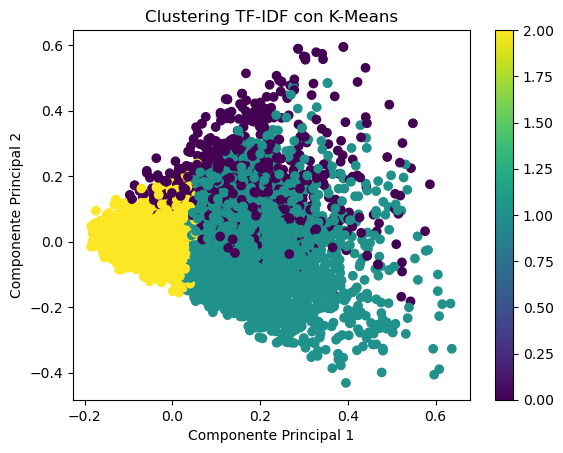

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

# Número de clusters
num_clusters = 3

# Crear modelo de K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Etiquetas asignadas a cada documento
labels = kmeans.labels_

# Imprimir resultados
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print([idx for idx, label in enumerate(labels) if label == i])

# Visualización opcional con reducción de dimensionalidad (usando PCA o TSNE)
from sklearn.decomposition import PCA

# Reducir dimensiones a 2D para graficar
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('Clustering TF-IDF con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

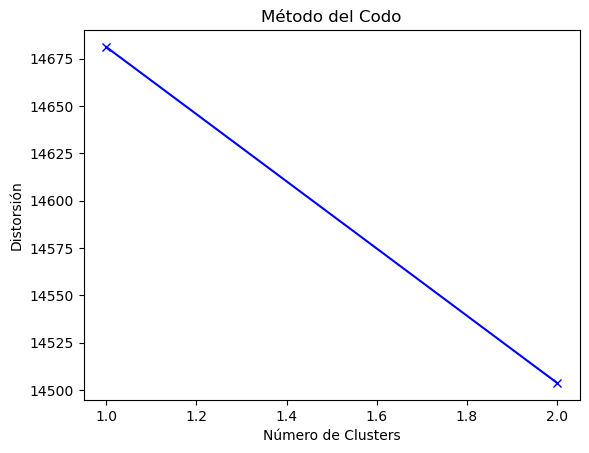

In [23]:
distortions = []
K = range(1, 3)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.title('Método del Codo')
plt.show()

In [24]:
import pandas as pd

# Contar documentos por cluster
clusters_count = pd.Series(labels).value_counts()
print(clusters_count)

2    10235
1     3772
0      993
Name: count, dtype: int64


## 7.2. Modelo Multinomial Naive Bayes:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")

Tamaño de entrenamiento: (10500, 15675)
Tamaño de prueba: (4500, 15675)


In [26]:
from sklearn.naive_bayes import MultinomialNB

# Crear y entrenar el modelo
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8346666666666667

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       304
           1       0.71      0.76      0.73      1117
           2       0.88      0.94      0.91      3079

    accuracy                           0.83      4500
   macro avg       0.70      0.57      0.55      4500
weighted avg       0.81      0.83      0.81      4500



In [ ]:
# Ajustar el parámetro alpha
nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

## 7.3. Modelo Categorical Naive Bayes:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Preprocesamiento y transformación de texto
X = DF_BookingCol['Texto_Lematizado'] 
y = DF_BookingCol['Clas']

# 2. Convertir el texto en una representación numérica (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 3. Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# 4. Entrenar el modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 5. Hacer predicciones y evaluar el modelo
y_pred = nb_model.predict(X_test)

# 6. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 96.69%

Classification Report:
               precision    recall  f1-score   support

   Negativos       0.96      0.97      0.97      2246
   Positivos       0.97      0.96      0.97      2254

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500


Confusion Matrix:
 [[2187   59]
 [  90 2164]]


# __8. Aplicación de word2vec__

In [39]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

nltk.download('punkt')

# 1. Preprocesamiento: Tokenización
# Convertir cada comentario en una lista de palabras
tokenized_comments = [
    word_tokenize(str(comment).lower()) for comment in DF_Final_2['Comentarios']
]

# 2. Entrenar el modelo Word2Vec
model = Word2Vec(
    sentences=tokenized_comments,   # Lista de listas de palabras
    vector_size=100,                # Tamaño de los vectores
    window=5,                       # Ventana de contexto
    min_count=2,                    # Mínimo número de ocurrencias
    workers=4,                      # Número de hilos para entrenamiento
    sg=0                            # Modelo CBOW (0) o Skip-gram (1)
)

# 3. Guardar el modelo entrenado (opcional)
model.save("word2vec_model.w2v")
print("Modelo Word2Vec entrenado y guardado.")

# 4. Ejemplos de uso
# Obtener el vector de una palabra
vector_palabra = model.wv['bueno']
print(f"Vector para 'bueno':\n{vector_palabra}")

# Encontrar palabras similares
similares = model.wv.most_similar('bueno', topn=5)
print(f"Palabras similares a 'bueno':\n{similares}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Modelo Word2Vec entrenado y guardado.
Vector para 'bueno':
[ 0.0335831   0.41322201  0.25442493  0.14991266 -0.2690163  -0.69269544
  1.0574003   1.157117   -0.7131061  -1.1445879   0.39000678 -0.71071535
 -0.20398305  0.05109956  0.15801217 -0.22514479  0.02647685 -1.0762612
 -0.4140703  -0.9546441   0.65741247  0.15636192  0.7262591   0.19997497
 -0.21516716 -0.495557   -0.12799811  0.16211341 -0.27882764  0.04719058
  0.6593618  -0.38492808  0.4661136  -1.3637091  -0.4131354   0.356721
  0.5021294   0.23643953 -0.6922835  -0.3114605   0.39855748 -0.81963885
  0.22774436  0.14537051  0.4836063  -0.17058635 -0.40134946 -0.44443595
  0.81362367  0.98284286 -0.37591752 -0.7307692   0.01849107 -0.04681412
  0.05295236 -0.2531734   0.29646835 -0.29679328 -0.5356569  -0.26738614
  0.50215334 -0.14354584  0.89091516  0.13116792 -0.71393865  0.59102625
  0.38876668  0.7289438  -0.6788423   0.63612     0.20342323  0.5266408
  0.721585   -0.18939638  0.94111675 -0.00619468 -0.07722822  0.32332

# __9. Aplicación de doc2vec__

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

# Descargar recursos necesarios
nltk.download('punkt')

# Preprocesamiento: Tokenización y creación de documentos etiquetados
tagged_documents = [
    TaggedDocument(words=word_tokenize(str(row['Comentarios']).lower()), tags=[str(index)])
    for index, row in DF_Final_2.iterrows()
]

# Crear y entrenar el modelo Doc2Vec
model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
model.build_vocab(tagged_documents)
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

# Guardar el modelo entrenado (opcional)
model.save("doc2vec_model.d2v")
print("Modelo Doc2Vec entrenado y guardado.")

# Ejemplo: Obtener el vector de un documento específico
vector = model.infer_vector(word_tokenize("Buen servicio"))
print(vector)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Modelo Doc2Vec entrenado y guardado.
[-0.01883581  0.04426999  0.05266513 -0.02174037  0.03776672 -0.09706105
  0.13096242  0.10430407 -0.08179636 -0.09231879  0.06280679 -0.03342386
 -0.00767774  0.03060963  0.00781777  0.01943977  0.02238526 -0.04762728
 -0.05936261 -0.12254172  0.03466598 -0.02281781  0.04741472  0.05189425
 -0.07384512 -0.02630113 -0.08730898  0.05044475 -0.05987927 -0.00241587
  0.06842615  0.04184439  0.08986621 -0.01428899 -0.01302078  0.12801059
  0.044645   -0.04345698  0.00899925 -0.07918295  0.00847634 -0.07847196
  0.0671736  -0.04785906  0.08515832 -0.0599208  -0.00969535 -0.05224984
  0.09788609  0.02318584  0.02386199 -0.05017626  0.01553024 -0.07514508
  0.02706496 -0.08139585  0.07207429 -0.03830904  0.02048703 -0.00235624
  0.03678472  0.00450238  0.07549622  0.00960037 -0.03219542  0.1022348
  0.02050126  0.12905139 -0.05191066  0.0293237   0.05629389  0.07442272
  0.02578179  0.0191091   0.10272754 -0.01333017 -0.00603673 -0.04221888
  0.07742257  0